In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests

from data_process import process_raw_data, process_curated_data

In [2]:
df_raw = process_raw_data(yr_list = [2023,2024])
df_cur = process_curated_data(df_raw = df_raw)

### Starting data processing
    ## Processing data of 2023
    ## Processing data of 2024


In [3]:
df_cur

,apelido,atleta_id,rodada_id,clube_id,posicao_id,variacao_num,media_num,pontos_num,preco_inicial,benefit_ratio
0,fabio,37656,19,266,gol,-0.57,4.42,1.00,12.76,0.078370
1,renato_augusto,38398,19,264,mei,-0.40,3.41,4.70,13.02,0.360983
2,marcelo,38402,19,266,lat,-0.22,6.76,4.20,13.77,0.305011
3,mariano,38877,19,282,lat,0.80,2.45,5.90,5.15,1.145631
4,hulk,39148,19,282,ata,-0.75,8.41,6.80,18.53,0.366972
...,...,...,...,...,...,...,...,...,...,...
7607,andre_silva,131617,14,276,ata,-1.20,2.69,0.00,6.89,0.000000
7608,rafael_paiva,132682,14,267,tec,1.10,5.60,9.52,8.13,1.170972
7609,arthur_viana,133528,14,283,ata,-0.14,-0.10,0.00,0.78,0.000000
7610,lucca_drummond,133566,14,285,ata,-0.70,1.77,-0.30,2.42,-0.123967


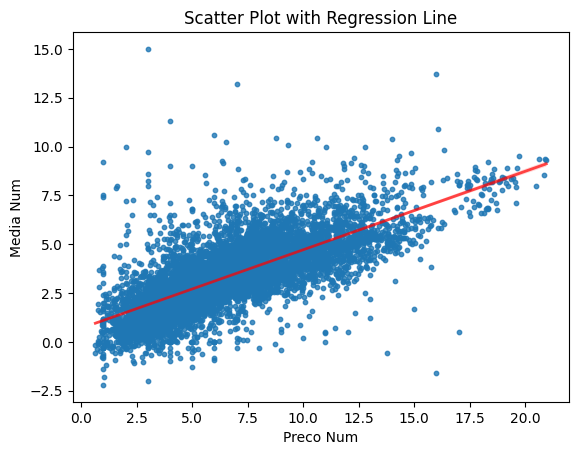

In [4]:
# Cria o scatter plot com a linha de regressão
sns.regplot(data=df_cur, x='preco_inicial', y='media_num', scatter_kws={'s':10}, line_kws={"color":"r","alpha":0.7,"lw":2})

# Adiciona títulos e rótulos de eixos, se necessário
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Preco Num')
plt.ylabel('Media Num')

# Mostra o gráfico
plt.show()

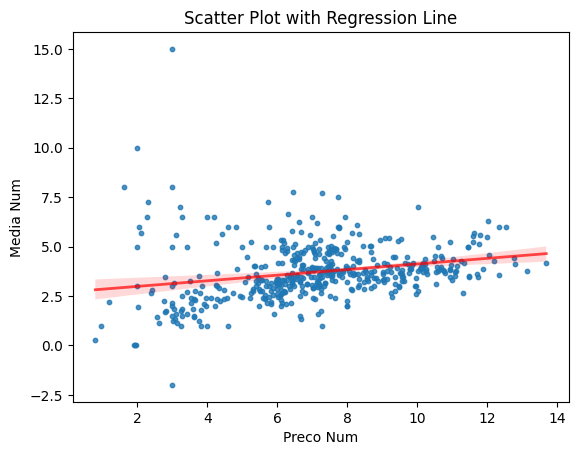

In [5]:
df_filtered = df_cur[df_cur["posicao_id"] == "gol"]
# Cria o scatter plot com a linha de regressão
sns.regplot(data=df_filtered, x='preco_inicial', y='media_num', scatter_kws={'s':10}, line_kws={"color":"r","alpha":0.7,"lw":2})

# Adiciona títulos e rótulos de eixos, se necessário
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Preco Num')
plt.ylabel('Media Num')

# Mostra o gráfico
plt.show()

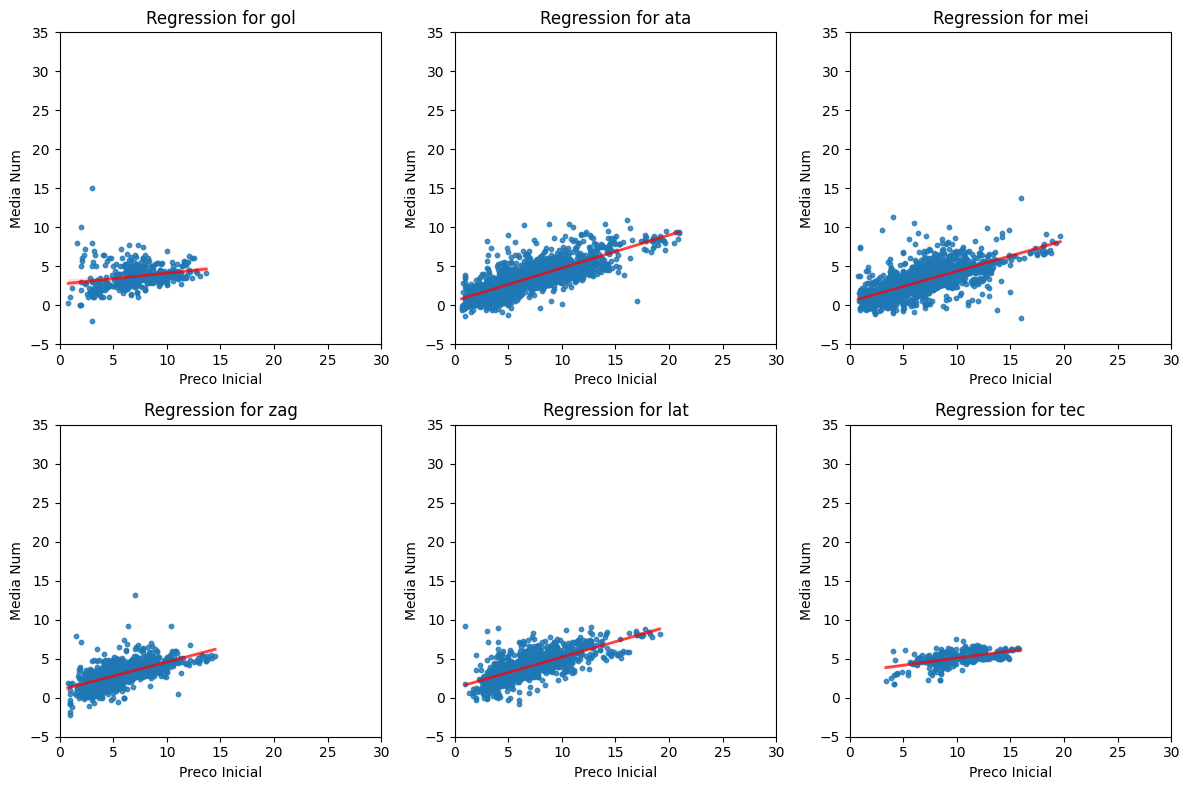

In [6]:
# Lista das posições
positions = ["gol", "ata", "mei", "zag", "lat", "tec"]

# Cria o grid de subplots (2x3)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Itera sobre as posições e os eixos do grid
for position, ax in zip(positions, axes.flat):
    df_filtered = df_cur[df_cur["posicao_id"] == position]
    sns.regplot(data=df_filtered, x='preco_inicial', y='media_num', scatter_kws={'s':10}, line_kws={"color":"r","alpha":0.7,"lw":2}, ax=ax)
    ax.set_title(f'Regression for {position}')
    ax.set_xlabel('Preco Inicial')
    ax.set_ylabel('Media Num')
    ax.set_xlim(0, 30)  # Define o limite do eixo x
    ax.set_ylim(-5, 35)  # Define o limite do eixo y

# Ajusta layout para melhor visualização
plt.tight_layout()
plt.show()

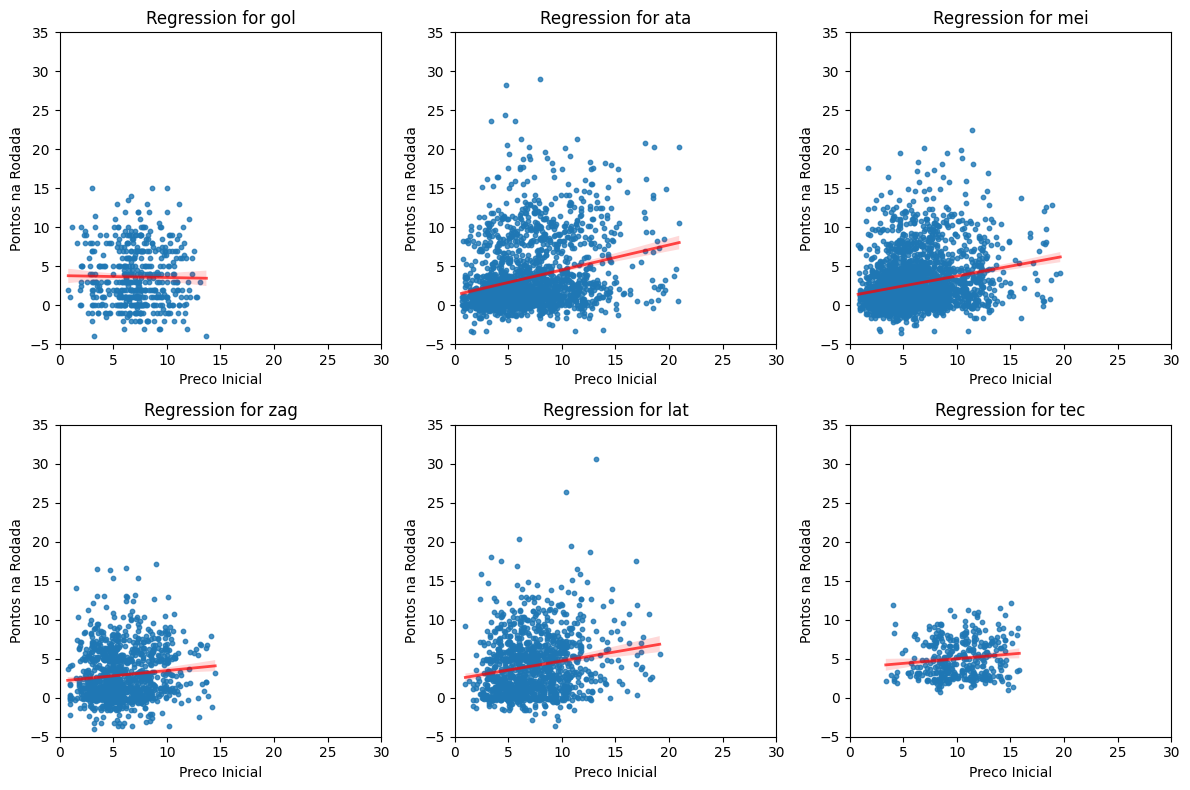

In [7]:
# Lista das posições
positions = ["gol", "ata", "mei", "zag", "lat", "tec"]

# Cria o grid de subplots (2x3)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Itera sobre as posições e os eixos do grid
for position, ax in zip(positions, axes.flat):
    df_filtered = df_cur[df_cur["posicao_id"] == position]
    sns.regplot(data=df_filtered, x='preco_inicial', y='pontos_num', scatter_kws={'s':10}, line_kws={"color":"r","alpha":0.7,"lw":2}, ax=ax)
    ax.set_title(f'Regression for {position}')
    ax.set_xlabel('Preco Inicial')
    ax.set_ylabel('Pontos na Rodada')
    ax.set_xlim(0, 30)  # Define o limite do eixo x
    ax.set_ylim(-5, 35)  # Define o limite do eixo y

# Ajusta layout para melhor visualização
plt.tight_layout()
plt.show()

<Axes: >

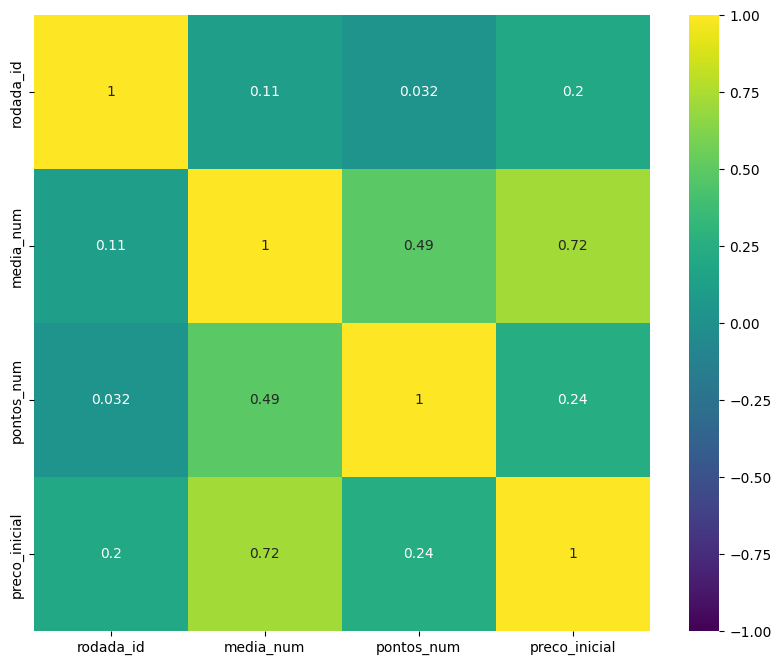

In [8]:
correlation_matrix = df_cur[["rodada_id","media_num","pontos_num","preco_inicial"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, cbar=True, square=True)


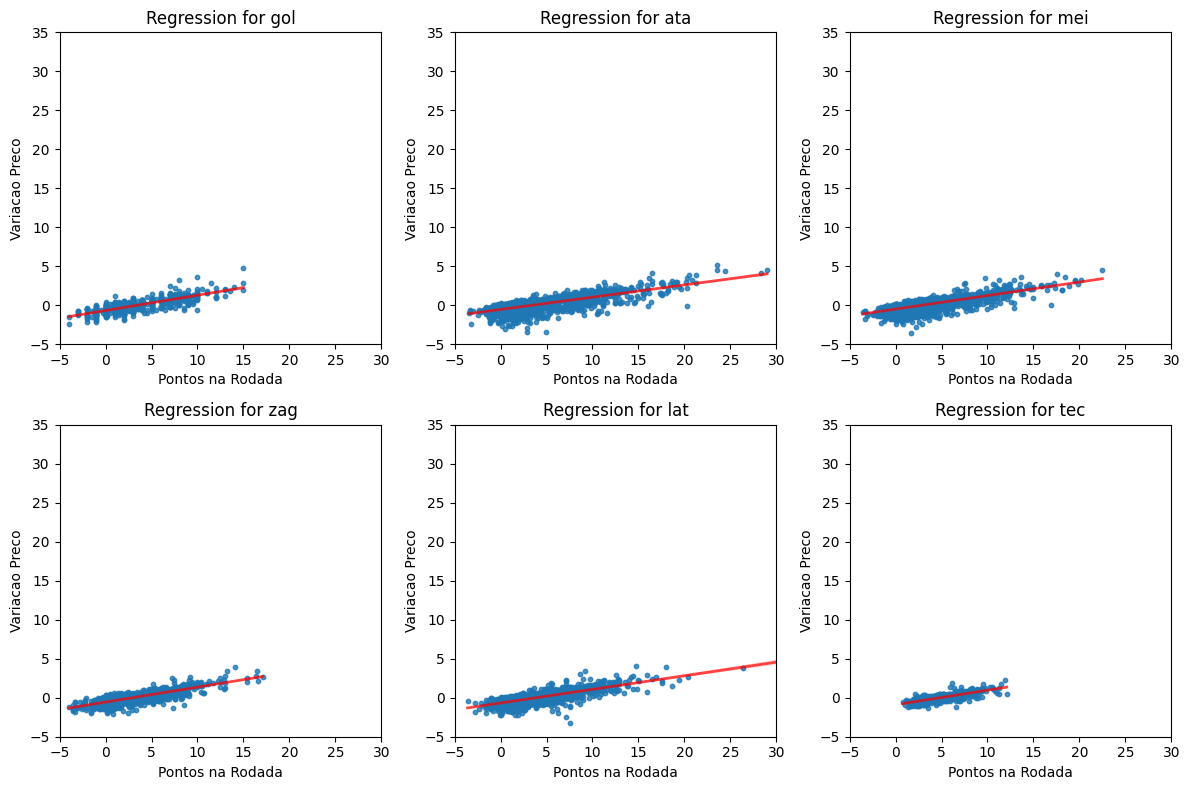

In [9]:
# Lista das posições
positions = ["gol", "ata", "mei", "zag", "lat", "tec"]

# Cria o grid de subplots (2x3)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Itera sobre as posições e os eixos do grid
for position, ax in zip(positions, axes.flat):
    df_filtered = df_cur[df_cur["posicao_id"] == position]
    sns.regplot(data=df_filtered, x='pontos_num', y='variacao_num', scatter_kws={'s':10}, line_kws={"color":"r","alpha":0.7,"lw":2}, ax=ax)
    ax.set_title(f'Regression for {position}')
    ax.set_xlabel('Pontos na Rodada')
    ax.set_ylabel('Variacao Preco')
    ax.set_xlim(-5, 30)  # Define o limite do eixo x
    ax.set_ylim(-5, 35)  # Define o limite do eixo y

# Ajusta layout para melhor visualização
plt.tight_layout()
plt.show()

In [10]:
df_cur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7596 entries, 0 to 7611
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   apelido        7596 non-null   object 
 1   atleta_id      7596 non-null   int64  
 2   rodada_id      7596 non-null   int64  
 3   clube_id       7596 non-null   int64  
 4   posicao_id     7596 non-null   object 
 5   variacao_num   7596 non-null   float64
 6   media_num      7596 non-null   float64
 7   pontos_num     7596 non-null   float64
 8   preco_inicial  7596 non-null   float64
 9   benefit_ratio  7596 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 652.8+ KB


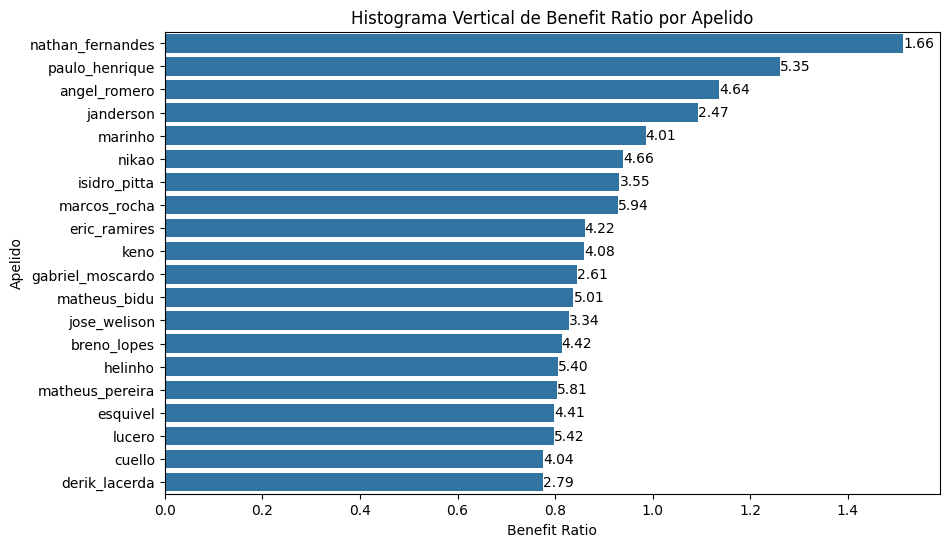

In [11]:
# Adicionando a coluna 'count' que conta o número de aparições de cada 'apelido'
df_cur['count'] = df_cur.groupby('apelido')['apelido'].transform('count')

# Filtrando para casos onde 'count' é maior que 1
df_filtered = df_cur[df_cur['count'] > 15]

# Agregando pela média de 'benefit_ratio' e 'pontos_num' por 'apelido'
df_grouped = df_filtered.groupby('apelido').agg({'benefit_ratio': 'mean', 'pontos_num': 'mean'}).reset_index()

# Ordenando pelo 'benefit_ratio' de forma decrescente e pegando os top 20
df_grouped = df_grouped.sort_values(by='benefit_ratio', ascending=False).head(20)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='benefit_ratio', y='apelido', orient='h')
plt.title('Histograma Vertical de Benefit Ratio por Apelido')
plt.xlabel('Benefit Ratio')
plt.ylabel('Apelido')

# Adicionando os rótulos de 'pontos_num'
for index, value in enumerate(df_grouped['benefit_ratio']):
    plt.text(value, index, f'{df_grouped["pontos_num"].iloc[index]:.2f}', va='center')

plt.show()
